# Data Details



*   Gender:
Lending institutions might consider gender as a factor in loan approval, depending on historical data or institutional policies. For instance, if there's evidence of gender-based discrimination, it could affect loan approval.


*   Married:
Married individuals may be perceived as more financially stable and responsible.
Lenders might be more inclined to approve loans for married applicants.


*   Dependents:
The number of dependents could influence loan approval, as more dependents might mean higher financial responsibilities. Lenders may assess the applicant's ability to repay the loan considering their family size.


*   Education:
The level of education might be a proxy for the applicant's earning potential and financial stability. Graduates may be perceived as having better job prospects and, consequently, higher repayment capabilities.


*   Self_Employed:
Self-employed individuals may face different income patterns compared to salaried individuals. Lenders might scrutinize the stability of self-employed applicants' income sources.


*   ApplicantIncome: Higher income generally indicates a better ability to repay a loan. However, extremely high or low incomes might be red flags. Lenders may set income thresholds for loan approval.


*   CoapplicantIncome: The income of the coapplicant can supplement the household income, affecting the overall repayment capacity. A higher coapplicant income may positively influence loan approval.

*   LoanAmount: The amount of the loan applied for is crucial. Lenders will assess whether the requested loan amount aligns with the applicant's income and financial situation.

*   Loan_Amount_Term: The term of the loan affects monthly repayment amounts. Shorter terms might indicate a quicker repayment ability, while longer terms might be associated with higher overall interest payments.


*   Credit_History: This is likely one of the most critical factors. A good credit history (1.0) is generally associated with a higher likelihood of loan approval. Lenders heavily rely on credit history to assess risk.

*   Property_Area: The location of the property can influence loan approval. Urban areas might have different risk profiles than rural areas, and lenders may have specific criteria for different regions.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/loan_Approval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
## Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

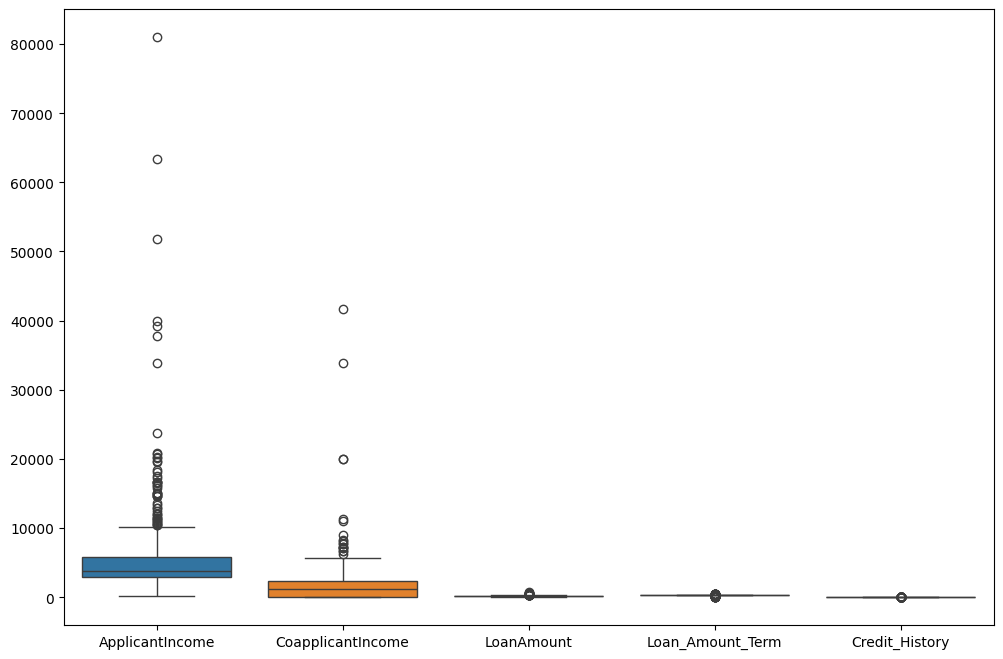

In [ ]:
## Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(df)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


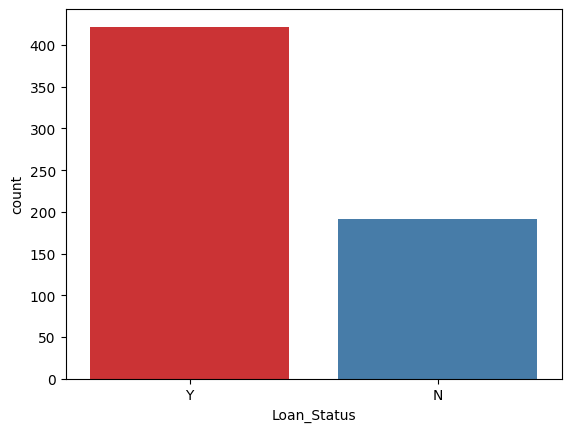

In [ ]:
print(df['Loan_Status'].value_counts())
sns.countplot(data= df, x='Loan_Status',palette='Set1')
plt.show()

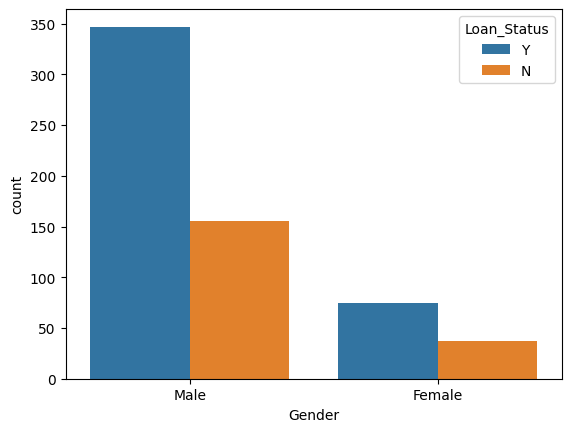

In [ ]:
sns.countplot(data=df, x='Gender',hue='Loan_Status')
plt.show()

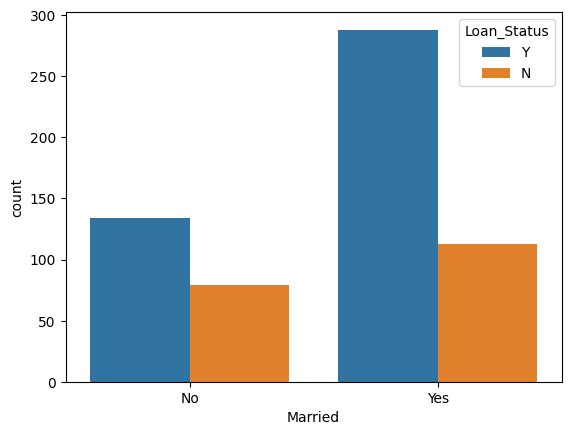

In [ ]:
sns.countplot(data=df, x='Married',hue='Loan_Status')
plt.show()

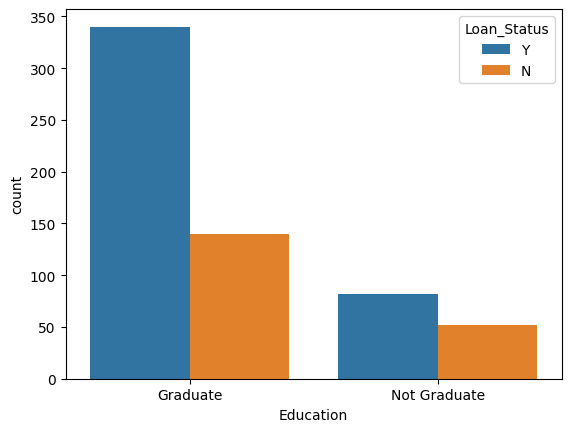

In [ ]:
sns.countplot(data=df, x='Education',hue='Loan_Status')
plt.show()

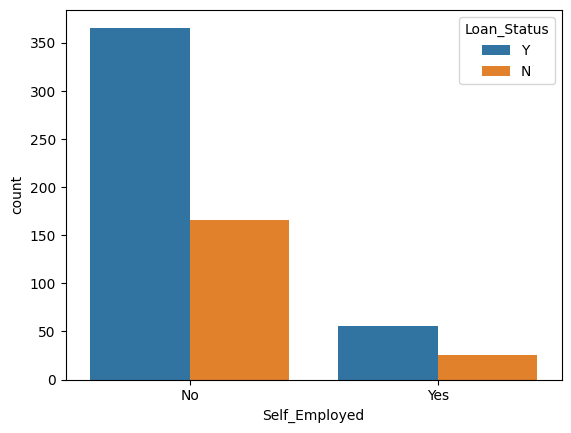

In [ ]:
sns.countplot(data=df, x='Self_Employed',hue='Loan_Status')
plt.show()

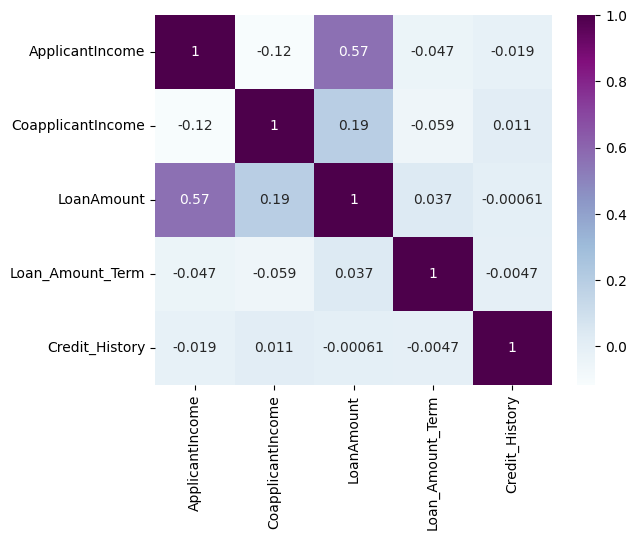

In [ ]:
corr = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr,annot=True,cmap='BuPu')
plt.show()

In [ ]:
# creating new features(columns)
df['Total_Income'] = df['ApplicantIncome']+ df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


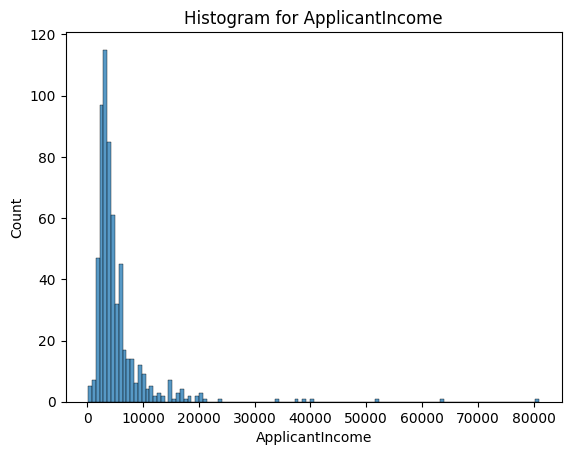

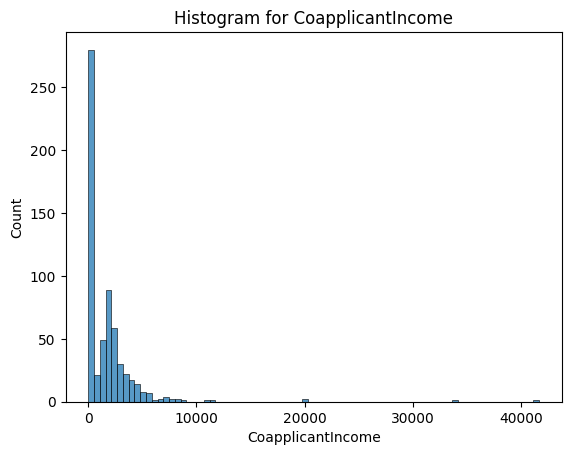

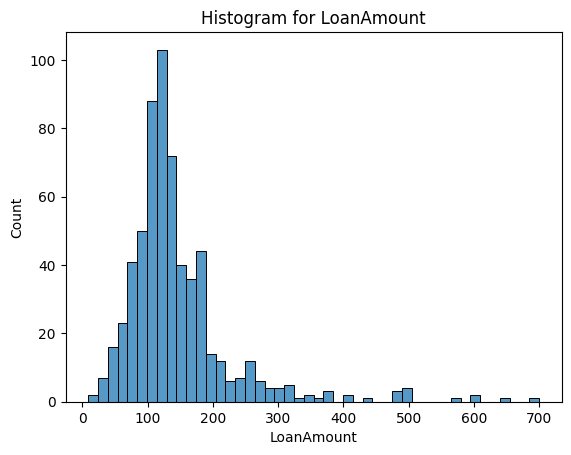

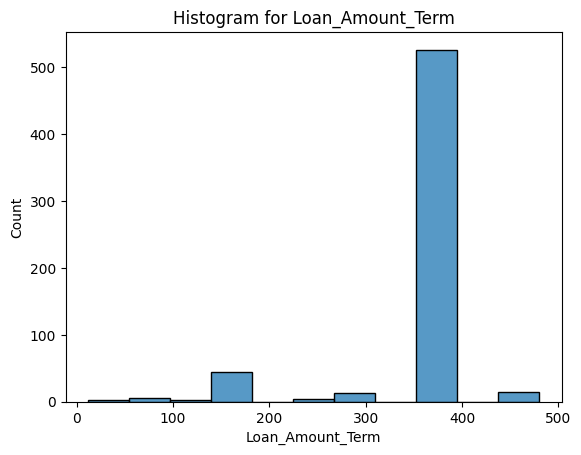

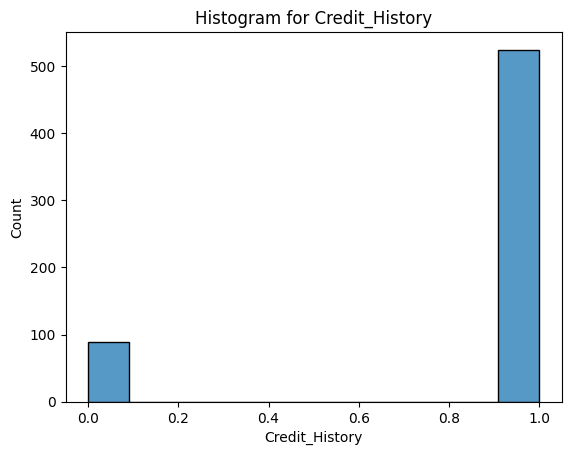

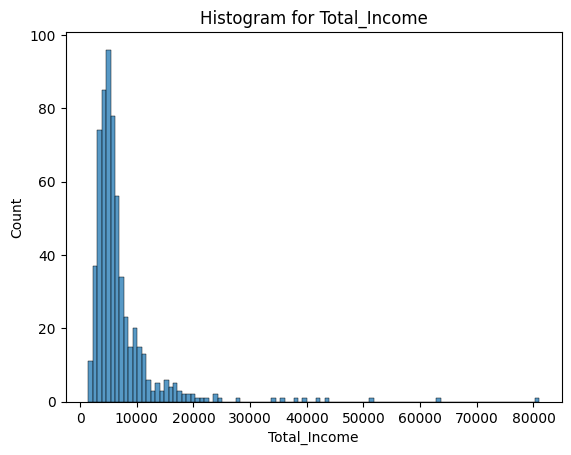

In [ ]:
numerical_columns = df.select_dtypes(include=['float','int']).columns

# For each numerical column, create a histogram
for col in numerical_columns:
    sns.histplot(df[col])
    plt.title(f'Histogram for {col}')
    plt.show()

here we can most float and int columns skews but we need normally skews

## Apply Log Transformation

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

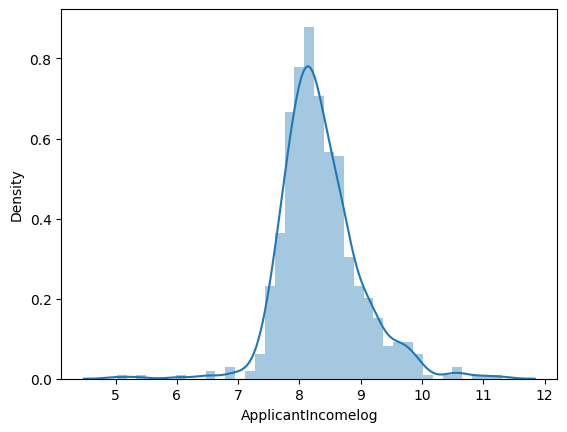

In [ ]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

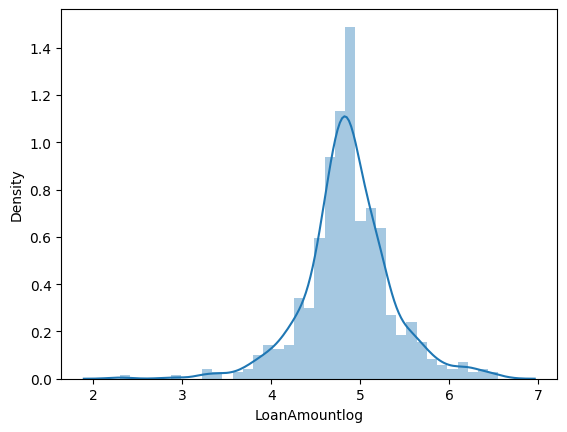

In [ ]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

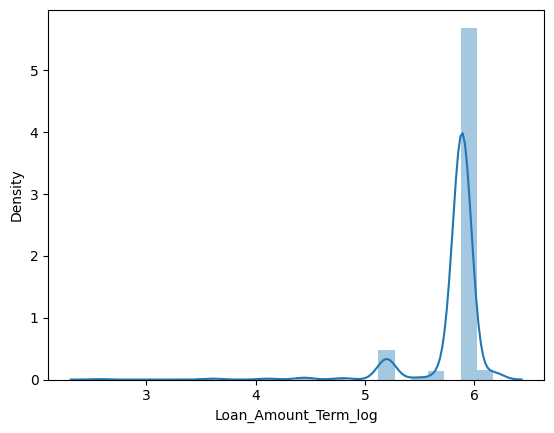

In [ ]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

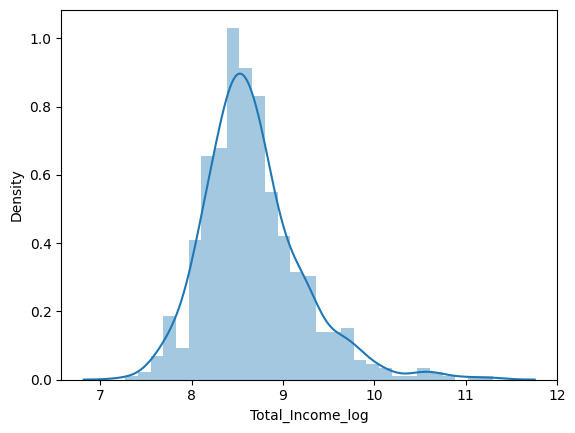

In [ ]:
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [ ]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [ ]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [ ]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

In [ ]:
# Split Independent and dependent features
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(x_train,y_train)
print('actul score:',model1.score(x_train,y_train))
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model1)
print('predict value:',accuracy)

actul score: 0.8217391304347826
predict value: 0.7727272727272727


In [ ]:
score = cross_val_score(model1,x,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [ ]:
np.mean(score)*100

80.9462881514061

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  74.02597402597402


In [ ]:
score = cross_val_score(model2,x,y,cv=5)
print("Cross Validation score of Decision Tree: ",np.mean(score)*100)

Cross Validation score of Decision Tree:  70.52245768359325


In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  77.27272727272727


In [ ]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  71.42857142857143


In [ ]:
from sklearn.metrics import classification_report

def genrate_classifaction_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"classifaction report for{model_name}:\n{report}\n")

genrate_classifaction_report(model1,y_test,y_pred_model1)
genrate_classifaction_report(model2,y_test,y_pred_model2)
genrate_classifaction_report(model3,y_test,y_pred_model3)
genrate_classifaction_report(model4,y_test,y_pred_model4)

classifaction report forLogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


classifaction report forDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.64      0.59      0.62        54
           1       0.79      0.82      0.80       100

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154


classifaction report forRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        54
           1       0.75      0.97      0.85       100

    accuracy                      

# here we can our accuracy not coming good, i think our data imbalanced

In [ ]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(x,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=x.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [ ]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.0,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,1.0,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.0,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.0,2,7.969012,3.828641,5.198497,7.969012


In [ ]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [ ]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [ ]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

68.24644549763033

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  79.62085308056872


In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  88.15165876777252


In [ ]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  72.03791469194313


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       114
           1       0.61      0.87      0.71        97

    accuracy                           0.68       211
   macro avg       0.72      0.70      0.68       211
weighted avg       0.72      0.68      0.68       211


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       114
           1       0.81      0.72      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.79      0.79       211
weighted avg       0.80      0.80      0.79       211


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.91      0.88        97

    accuracy                